# DBSCAN demo in 2D
2018 Winter Term 1

By Mike Gelbart (converted to Julia by Jason Chau)

In [14]:
# import os 

# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.metrics.pairwise import euclidean_distances

using PyCall,PyPlot
plt = pyimport("matplotlib.pyplot")

function plot_clust(X;W=nothing,z=nothing)
    if z != nothing
        if any(z.<0)
            plt.scatter(X[z.<0,1], X[z.<0,2], marker="o", 
                        facecolors="none", edgecolor="black", alpha=0.3);
        end
        if any(z.>=0)
            plt.scatter(X[z.>=0,1], X[z.>=0,2], marker="o", c=z[z.>=0], alpha=0.3);
        end
    else
        plt.scatter(X[:,1], X[:,2], marker="o", c="black", alpha=0.3);
    end
    if W != nothing
        plt.scatter(W[:,1], W[:,2], marker="^", s=200, c=1:size(W)[1]);
    else
        len = length(filter(!isequal(-1),unique(z)))
        plt.title("number of clusters = $len");
    end
end

plot_clust (generic function with 3 methods)

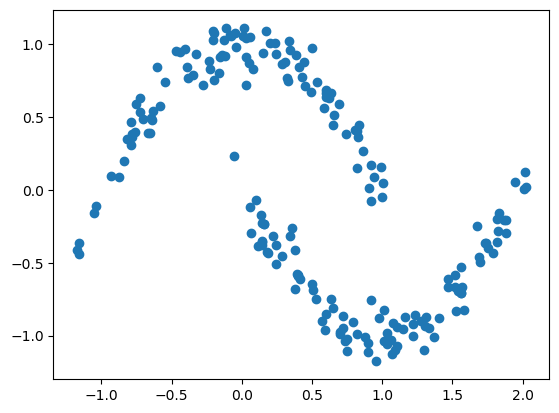

In [8]:
n1 = 100
x1 = range(-1,stop=1,length=n1) + randn(n1).*0.1
y1 = 1 .-x1.^2 + randn(n1).*0.1
n2 = 100
x2 = range(0,stop=2,length=n2) + randn(n2).*0.1
y2 = (x2.-1).^2 .-1 + randn(n2).*0.1
x = vcat(x1,x2)
y = vcat(y1,y2)
plt.scatter(x,y)
X = hcat(x,y);

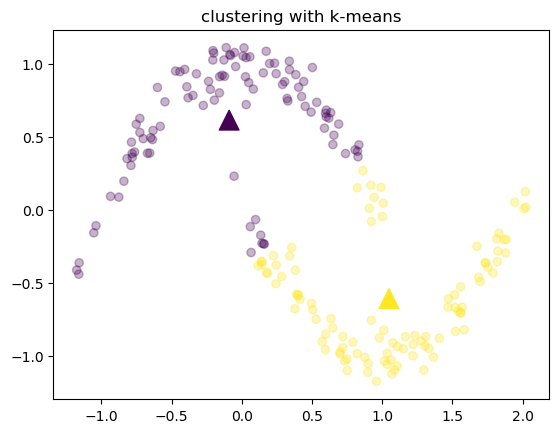

In [9]:
SkCluster = pyimport("sklearn.cluster")
kmeans = SkCluster.KMeans(n_clusters=2)
kmeans.fit(X)

plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)
plt.title("clustering with k-means");

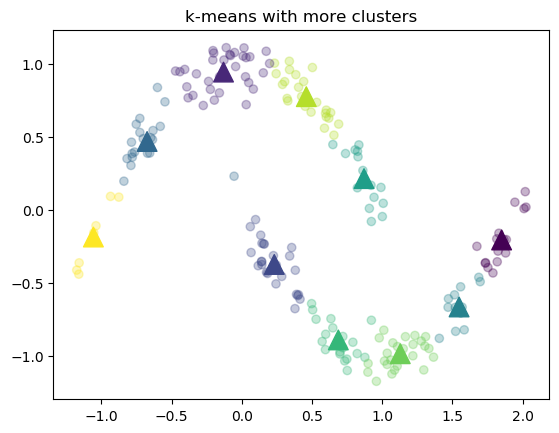

In [10]:
kmeans = SkCluster.KMeans(n_clusters=10)
kmeans.fit(X)

plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)
plt.title("k-means with more clusters");

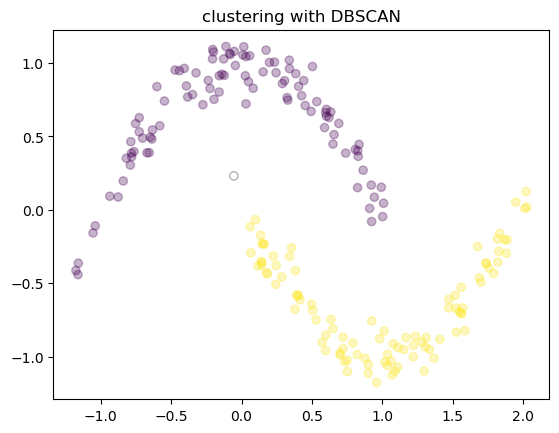

In [16]:
dbscan = SkCluster.DBSCAN(eps=0.3)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)
plt.title("clustering with DBSCAN");

### Effect of the DBSCAN hyperparameters

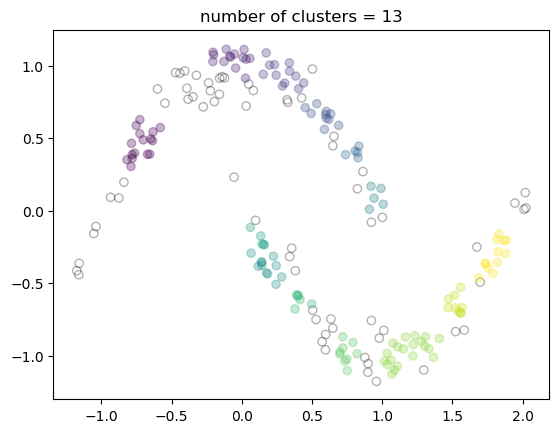

PyObject Text(0.5, 1, 'number of clusters = 13')

In [17]:
dbscan = SkCluster.DBSCAN(eps=0.1)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

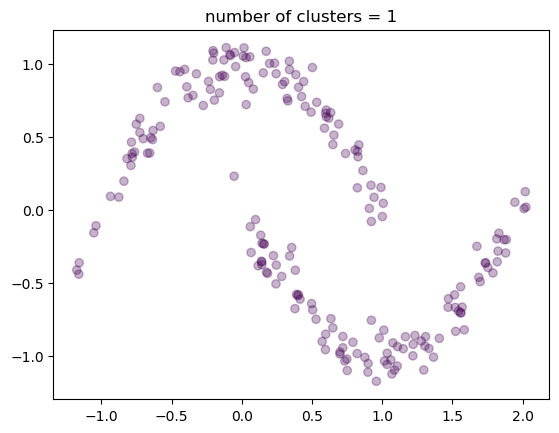

PyObject Text(0.5, 1, 'number of clusters = 1')

In [18]:
dbscan = SkCluster.DBSCAN(eps=1)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

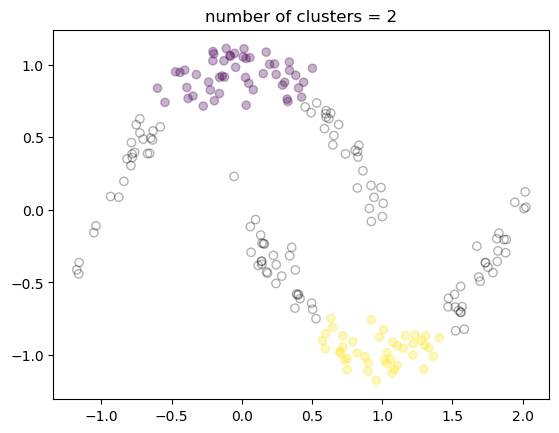

PyObject Text(0.5, 1, 'number of clusters = 2')

In [19]:
dbscan = SkCluster.DBSCAN(eps=0.3, min_samples=25)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

## Effect of initialization with DBSCAN

We can change the "initialization" by re-ordering the points. The effects are small but can change the label of some points between clusters.

In [24]:
X_extra = vcat(X, [0.5 0]);

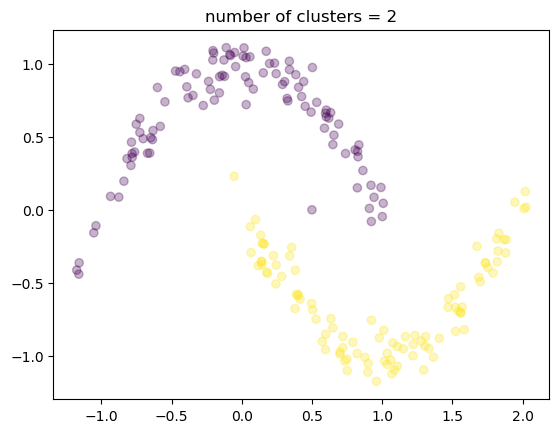

PyObject Text(0.5, 1, 'number of clusters = 2')

In [25]:
dbscan = SkCluster.DBSCAN(eps=0.4)
dbscan.fit(X_extra)
plot_clust(X_extra,z=dbscan.labels_)

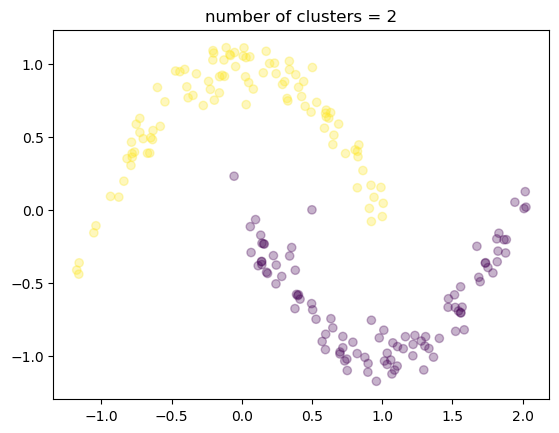

PyObject Text(0.5, 1, 'number of clusters = 2')

In [26]:
X_extra_reversed = X_extra[end:-1:1,:]

dbscan = SkCluster.DBSCAN(eps=0.4)
dbscan.fit(X_extra_reversed)
plot_clust(X_extra_reversed,z=dbscan.labels_)

Above, we reversed the order of the data set which flipped the cluster colours. But, notice the middle point was originally in the top cluster and is now in the bottom cluster.

### An example where k-means works better

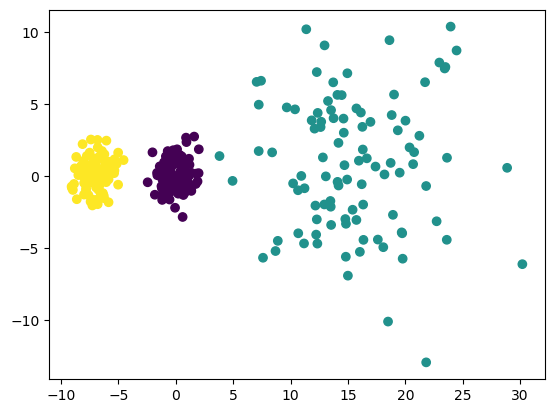

In [36]:
n1 = 100
μ1 = [0,0]
σ1 = 1
X1 = σ1.*randn(n1,2) .+ μ1'

n2 = 100
μ2 = [15,0]
σ2 = 5
X2 = σ2.*randn(n2,2) .+ μ2'

n3 = 100
μ3 = [-7,0]
σ3 = 1
X3 = σ3.*randn(n3,2) .+ μ3'


X = vcat(X1,X2,X3)
z_true = vcat(zeros(n1),ones(n2),ones(n2).+1)

plt.scatter(X[:,1],X[:,2], c=z_true);

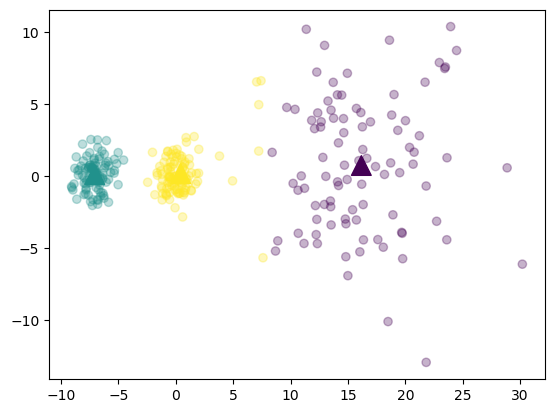

PyObject <matplotlib.collections.PathCollection object at 0x0000000028F74898>

In [37]:
kmeans = SkCluster.KMeans(n_clusters=3)
kmeans.fit(X)
plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)

$k$-means performs reasonably here, although of course it gets the benefit of me telling it the true number of clusters.

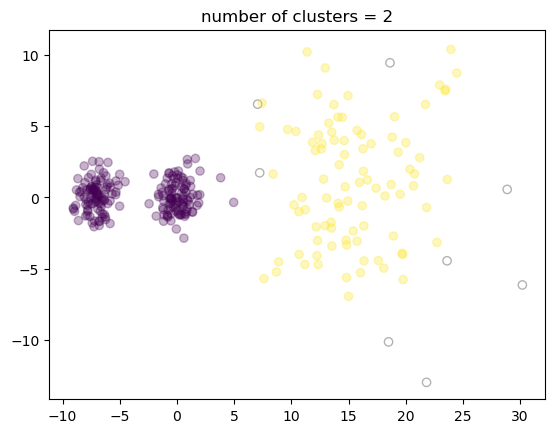

PyObject Text(0.5, 1, 'number of clusters = 2')

In [38]:
dbscan = SkCluster.DBSCAN(eps=3, min_samples=5)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

This doesn't look too great. You can try fiddling with the hyperparameters of DBSCAN here. The example is problematic because we have two different densities of clusters, and yet the `eps` parameter roughly sets a single density of cluster that we're looking for. If we make `eps` large enough to keep the non-dense (right-hand) cluster together, then it'll also end up joining the left two clusters.